# Neural networks

Now this is the big topic of the last few decades. Since the 2010s, neural networks have become the most popular method applied in the field of ML. Why is that? We'll talk a bit about the history of neural networks, what they needed and lacked and what changed.

#### History

Neural networks were first introduced in the 1940s by Warren McCulloch and Walter Pitts. They proposed a simple electrical circuit that could be used to model the behavior of neurons. Later, the idea that neurons' pathways strengthen over repeated use, especially between neurons that fire together (Donald Hebb). That was the beginning of mapping the brain to a computer.  

The start of the neural networks algorithm came with Frank Rosenblatt in 1957. He proposed the perceptron, a simple neural network that could be used to classify linearly separable data. The perceptron was a single layer neural network with a single output neuron. The input was processed as a weighted sum; then a threshold was applied, and the output was either 0 or 1.

![An image of the perceptron; it has an input layer, does a weighted sum over the numbers and applies a threshold to determine the output as 1 or 0](https://miro.medium.com/max/1400/1*ofVdu6L3BDbHyt1Ro8w07Q.png)  
Via [Towards Data Science](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Frosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a&psig=AOvVaw3D5MgtSVmqF_YPMurYUCxv&ust=1674493057232000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCIj4pfDS2_wCFQAAAAAdAAAAABAg)  

The goal of the perceptron was to "learn" the weights of the linear combination, in order to minimize the difference between predicted output and desired output. Unfortunately, the perceptron could only learn linearly separable data, due to the linear processing applied. Another problem came with the scale of the model itself. By adding multiple layers, the model could learn more complex functions, and finally separate non-linear data. The problem, however, was the sheer complexity of the training task. At the time, the hardware and the methods applied were indicative of the fact that neural networks would lead to nowhere. That's how the first "AI winter" came to be, as AI research was abandoned for a while.  

In the 1980s, the next efforts to bring AI forward began. Backpropagation had been implemented in the late 1960s, but it was only in the 1980s that people thought to use it for neural networks (we will discuss backpropagation in a future section). By this time, the so-called "Expert system" algorithm was adopted by many companies, relying on sets of rules to solve problems and make decisions. Around 1990, the fall of export systems brought a 2nd AI winter, although a shorter one. The developments of multi-layer perceptrons powered by the backpropagation algorithm kept going. The problem was with hardware capabilities. These "slow learners" relied on many, many iterations to reach good solutions. Computers needed to go faster. As such, progress was slow, dependent on the speed of the processors.  

In the 2000s, the "AI summer" came. The development of GPUs (graphics processing units) allowed for a huge increase in the speed of neural networks. The first GPU was released in 1999, and by 2006, the first GPU-based neural network was developed. GPUs' role is to compute a lot of math at the same time. As it so happens, this is exactly what networks need. As such, the speed of the training process increased by a considerable order of magnitude. The development of the internet and the spreading availability of datasets (data) allowed for the development of deep learning, which is the name given to neural networks with many layers (depends on each person, but generally networks with more than 3 hidden layers are considered deep).  
In the 2010s, GPUs leaped in performance, cementing the research of neural networks at the front of the AI industry. With time, specialized hardware was introduced, such as TPUs (Tensor Processing Units) and (lately) ML accelerators on mobile devices.


# Introduction

Now that we know a bit about how neural networks came to be, let's talk about what they are and how they work. We've mentioned them before, so now we'll go into detail.  

A neural network is model that tries to mimic the human brain. Instead of actual neurons, we're using numbers and functions to achieve results. Each cell in a network is a **neuron**. The connections represent the pathways between neurons. In ML, they are called **weights** (mathematically), or **edges** (graphically, coming from the discipline of graphs). The neurons are organized in layers (input, hidden, output), and we apply **activation functions** after each layer's values have been computed. These activation functions are used to introduce non-linearity into the network (we'll see in more detail as we implement a network).  

![A simple network with 3 input neurons connected to a hidden layer with 2 neurons and an output layer with 2 neurons. Each layer's neurons are fully connected to the next batch](../assets/simpleNN.png)  

Let's disect this image, shall we?  
##### Input layer
We have neurons $n_1, n_2, n_3$ in the input layer. These receive the input data. The features we've been using so far are these neurons' values. Quite simple and direct so far. We now have to use and combine them somehow to reach useful information. The weights are the connections between neurons of consecutive layers. These denote the "importance" of any given neuron's value.

##### Hidden layer
These are the intermediary layers that do the bulk of the processing. Let's jump to an example. Using the diagram above, the 2 neurons in the hidden layer would receive the following values:
$$
\begin{align}
n_{1, hidden} &= w_{1, 1} \cdot n_1 + w_{2, 1} \cdot n_2 + w_{3, 1} \cdot n_3 \\
n_{2, hidden} &= w_{1, 2} \cdot n_1 + w_{2, 2} \cdot n_2 + w_{3, 2} \cdot n_3
\end{align}
$$
I haven't numbered them, since it won't be that important. What matters is that we observe the following fact: what we're doing is essentially a linear combination of the input values. Remember when we discussed linear regression? We are following the same steps here. But something is missing: the bias term. Yes, we need it, as we've needed it before. Just as a linear function would not be able to fit to data that does not go through the origin, a neural network cannot fit to certain types of data without the bias term. In terms of how neural networks cover this need, we could have an additional neuron on each layer with a constant value of 1. The weight associated with that neuron would be the bias term.

##### Output layer
I have drawn 2 neurons in the output layer. It's important to introduce this fact early on: neural networks can produce any number of outputs, so it's a matter of the problem at hand and the result we want to achieve. After the computing has been done, these neurons will hold the final result: the output of the neural network.

### Warning: activation functions
I would like you to consider the following issue: as we've seen, going from one layer to the next involves computing a linear combination of the values in the previous layer. Apply this any number of times, but in the end what you get is still a linear combination. We know for a fact that a linear combination outputs a line, no matter how many times we apply it. This is problematic. We need to introduce non-linearity into the network, in order to help it fit data in high-dimensional space that is not linearly separable. This is why **activation functions** exist. They are applied after each layer's values have been computed.  

There are lots of activation functions out there, and we could in theory use anything, but the purpose is to introduce non-linearity with the cheapest computational cost possible. Here are the most common ones:
- Sigmoid  
![sigmoid](https://miro.medium.com/max/640/1*Xu7B5y9gp0iL5ooBj7LtWw.webp)  
Via [Towards Data Science](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)
- Tanh  
![tanh](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png)  
Via [Papers with code](https://paperswithcode.com/method/tanh-activation)
- ReLU  
![relu](https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png)  
Via [Nomidl](https://www.nomidl.com/deep-learning/what-is-relu-and-sigmoid-activation-function/)
- Leaky ReLU  
![leaky relu](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-25_at_3.09.45_PM.png)  
Via [Papers with code](https://paperswithcode.com/method/leaky-relu)

Anything that isn't a simple $f(x) = x$ will do. But we have to be careful about the computation involved. This is why the industry turned to ReLU, for it's simplicity and speed. We've talked about gradient descent before. Imagine calculating the derivative of Tanh vs ReLU. The former is a lot more complex, and the latter is a simple $f(x) = 1$ if $x > 0$, and $f(x) = 0$ otherwise. This is why ReLU is so popular. It really might be the most popular out there. We'll talk about the *vanishing gradient* problem after discussing the training of neural networks, and we'll see why sigmoid and tanh are not used as much.  

### Some more details

There are a few things one should know about neural networks, right from the beginning. They can be arranged in a multitude of ways, which is why lots of architectures exist. We call nets in which all neurons are connected as *fully connected*. We'll see that there are problems that benefit from designing a network with a different topologies.  
The more layers & neurons we have, the more complex the data we can fit. The great thing about networks is that they really excel at finding patterns in highly-dimensional, highly-complex data. They don't require human intervention all that much. If we see signs of high bias (underfitting), we can simply add more neurons (existing or new layers). This increases complexity. The problem then is to gather enough data to be able to train these. They are prone to overfitting without a lot of data, since they are so great at fitting despite complexity.  

One thing to keep in mind: the parameters we train with NNs are the *weights*. Neurons are simply information-holding cells. Activation functions are static procedures we apply to values. There is nothing we should be modifying except for weights. Now, consider the number of the weights. They are parameters, so for each one we add, we increase the required compute power. In the diagram above, we have 10 weights. That's 10 parameters to tweak. Add the bias terms (in practice, you really should), and we get another 4, so that's 14 total. Things get really complicated really fast.

## Recap: how do NNs work?

We get our features/values into the input layer.  
Those values are part of linear combinations, which go to the next layer.  
Each neuron in that next layer applies an "activation function" (a non-linear function), which updates the values.  
Those are the final values of that layer.  
The next step is to repeat the process for the next layer, until we reach the output layer.

# Training: How do we find the optimal parameters?

Starting with the basics, neural networks are a supervised algorithm. This means we know the output. This also means we can define error/loss functions. These tell us how far from the real answer we are.  
The next step is to define a method that brings us closer to the right values for the parameters. We could guess and check. Imagine how slow that would go, based on the fact that a simple network like the one above should have 14 parameters to tweak. So then we use math. We turn to *gradient descent* and *backpropagation*.  

## Gradient descent

Gradient descent is a method that allows us to find the minimum of a function, by continuously updating our parameters to go towards the direction of the steepest descent. We've already seen it in action, so the new element is backpropagation. Let's check the simple network again:  
![The same network from before](../assets/simpleNN.png)  
Our parameters are the weights between the neurons. Our error is after the output layer. We can reach the weights just before the output layer, since we know the steps that were applied to calculate our final output.  
We will make some notations:  
$g_1(x) = w_1x + b_1$  
$g_2(x) = w_2x + b_2$  
Let's call our output neurons $o_1$ and $o_2$. Their values would be:  
$o_1 = f(g_1(x))$  
$o_2 = f(g_2(x))$  

Where we would have $f$ as the activation function, $w_i$ as the corresponding set of weights, $b_i$ as the bias terms, and $x$ as the values of the previous layer of neurons.  

By applying our error function to these $o_i$ values, we get the error. In order to reach the error with respect to the weights, we need to get through some steps. We apply *the chain rule*:  
$$
\frac{\partial E}{\partial w_1} = \frac{\partial E}{\partial o_1} \frac{\partial o_1}{\partial w_1} = \frac{\partial E}{\partial o_1} \frac{\partial o_1}{\partial g_1} \frac{\partial g_1}{\partial w_1}
\\
\text{} \\
\\
\frac{\partial E}{\partial w_2} = \frac{\partial E}{\partial o_2} \frac{\partial o_2}{\partial w_2} = \frac{\partial E}{\partial o_2} \frac{\partial o_2}{\partial g_2} \frac{\partial g_2}{\partial w_2}
$$  

As you can see, terms can be nullified if we're looking diagonally.

#### A bit of math

We call it the chain rule because it helps us get through the chain of operations that led to the final output. We can calculate how much each part of the whole equation contributed to the final error.  
In order to properly calculate some values (or get some equations), we have to choose our functions. Let's suppose our NN classifies some data. Both our outputs would be a 1 or a 0. For the error function, we'll choose the squared error, and the activation function will be ReLU.  

Let's list them:
$$
\begin{align}
E &= \frac{1}{2}(o_1 - y_1)^2 + \frac{1}{2}(o_2 - y_2)^2 \\
o_1 &= f(w_1x + b_1) \\
o_2 &= f(w_2x + b_2) \\
f(x) &= \begin{cases} 0 & x < 0 \\ x & x \geq 0 \end{cases} \\
o_i &= \begin{cases} 0 & w_ix + b_i < 0 \\ w_ix + b_i & w_ix + b_i \geq 0 \end{cases} \\
\end{align}
$$  

So then, let's consider our first weight, $w_1$. Here are our derivatives:  
$$
\begin{align}
\frac{\partial E}{\partial o_1} &= o_1 - y_1 \\
\frac{\partial o_1}{\partial w_1} &= \begin{cases} 0 & w_1x + b_1 \leq 0 \\ x & w_1x + b_i > 0 \end{cases} \\

\frac{\partial E}{\partial w_1} &= (o_1 - y_1) * \frac{\partial o_1}{\partial w_1} \\
\end{align}
$$
$$
\text{Note: Derivative of ReLU is undefined in 0, but we can set it to 0, since that would be the value of the function in that point.} \\
$$


Of course, in these formulas, x would be a vector, which is not the right way to go about this. We considered $w_1$ and $w_2$ as sets of weights. In practice, we take each constituent weight and calculate the error with respect to it. The $x$ would be the corresponding output of the previous neuron. Note: we also calculate the error with respect to the bias terms. They don't get the $x$ in the formula.  

Let's suppose we did our math correctly, we got the error with respect to the weights just before the output layer. As we know, GD tells us to now update their values by subtracting the error times a learning rate. We know the drill by know. But...  

What about the previous layers? Well, it turns out we do essentially the same steps, but more of them. This is where backpropagation comes in.

# Backpropagation

Backpropagation is the process of propagating the error of the weights in the previous layers (back + propagation, makes sense right?). We do this by applying the chain rule. We start with the output layer, and we go backwards. We calculate the error of the weights just before the output layer, then we calculate the error of the weights just before that layer, and so on. In short, we apply gradient descent per layer going from output to input. Of course, the input layer has no weights to update, so we stop there.  

As such, we call the prediction part of the network the *forward pass* (forward propagation), and the training part the *backward pass* (backpropagation).  

As an example, the $w_11$ weight after the input layer would have the following error:  
$$
\begin{align}
\frac{\partial E}{\partial w_{11}} &= \frac{\partial E}{\partial o_1} \frac{\partial o_1}{\partial w_{11}} + \frac{\partial E}{\partial o_2} \frac{\partial o_2}{\partial w_{11}} \\
&= (o_1 - y_1) \frac{\partial o_1}{\partial w_{11}} + (o_2 - y_2) \frac{\partial o_2}{\partial w_{11}} \\
\end{align}
$$

Where $o_i$ is the output of a neuron in the output layer.  
We're missing the derivatives of $o_i$ with respect to $w_{11}$. But $w_{11}$ is not directly linked to any of the outputs. How do we calculate this, then?  
We're going to go in-depth, since this seems to be the only way to make sure that everything makes sense.

# Backprop, step by step

In order to do this properly, we'll need a more detailed diagram of our network. This time, each notation is important so we can keep track of what's happening.  

![Diagram of neural network with notations in order. Input has 3 neurons. There is 1 hidden layer with 2 neurons. Output has 2 neurons. Bias is displayed for input and hidden layer. Notations for weights are w with i and j indices, where i is the index of the neuron in the 1st layer, and j is the index of the neuron in the 2nd layer. Weights also have a superscript, which is the index of the layer they go into. We've considered the hidden layer as layer 1. Bias is denoted by a b with an index and a superscript with the layer. Notation before activation function of a layer is H index i and superscript with layer. The hidden layer is denoted by Z and index after activation function. The output layer just has the notation O after the activation function.](../assets/simpleNNdetailed.png)  
This one diagram is going to help us make sense of everything that is going on. I would recommend drawing it on a piece of paper before going forward.  
Let's first go through what each notation means.  

Input: we have 3 input variables, $x_1$, $x_2$ and $x_3$. This time, we have drawn the bias terms. We consider a fictitious input that has a constant value of 1. If we do the calculations normally, we just multiply the bias by 1, which leaves the bias term unchanged. This helps us scale computation later on.  
The indexes correspond to the neurons in each pair of layers. The superscript is the index of the layer that the weight goes into (if we had multiple hidden layers, we would have superscripted the z's as well). We consider the hidden layer as layer 1.  With these notations in mind, you should be able to trace out the forward pass through the network. We're going to go through the backward pass together.  

##### Note: Any kind of number a variable influences, that number can be partially derived with respect to that variable. No matter how many things were added on top, we can always use the chain rule to get back to that one variable. You will see this in action as we go.

A reminder on some notations and formulas we use:
$$
\begin{align}
h_1^{(1)} &= \sum_{i=1}^3 w_{i1}^{(1)}x_i + b_1^{(1)} \\
z_1 &= f(h_1^{(1)}) \\
f(x) &= \begin{cases} 0 & x < 0 \\ x & x \geq 0 \end{cases} \\
h_1^{(2)} &= \sum_{i=1}^2 w_{i1}^{(2)}z_i + b_1^{(2)} \\
o_1 &= f(h_1^{(2)}) \\
E &= \frac{1}{2} \sum_{i=1}^2 (o_i - y_i)^2 \\
\end{align}
$$
$$
\text{$y_i$ is the ground truth for the i-th output neuron.} \\
$$  
The rest of the terms are calculated similarly to these.  
As we go through the process, I highly recommend writing everything down. It helps with understanding.

### Calculating the error of the output layer

$$
E = \frac{1}{2} \sum_{i=1}^2 (o_i - y_i)^2 \\
$$
$$
\begin{align}
\frac{\partial E}{\partial o_1} &= o_1 - y_1 \\
\frac{\partial E}{\partial o_2} &= o_2 - y_2 \\
\end{align}
$$
Going further:

$$
\begin{align}
\frac{\partial E}{\partial h_1^{(2)}} &= \frac{\partial E}{\partial o_1} \frac{\partial o_1}{\partial h_1^{(2)}} \\
\frac{\partial o_1}{\partial h_1^{(2)}} &= \begin{cases} 1 & h_1^{(2)} > 0 \\ 0 & h_1^{(2)} \leq 0 \end{cases} \\
\frac{\partial E}{\partial h_1^{(2)}} &= (o_1 - y_1) ,&  h_1^{(2)} > 0\\
\end{align}
$$
We're supposing that these branches go in the "$> 0$" direction, since otherwise it's not that useful. This helps with making things clearer.
$\frac{\partial E}{\partial h_2^{(2)}}$ is analogous.  

Finally, going for the weights (the part that really interests us, since they are the variables we can actually change):
$$
\begin{align}
h_1^{(2)} &= \sum_{i=1}^2 w_{i1}^{(2)}z_i + b_1^{(2)} \\
\frac{\partial E}{\partial w_{11}^{(2)}} &= \frac{\partial E}{\partial h_1^{(2)}} \frac{\partial h_1^{(2)}}{\partial w_{11}^{(2)}} \\
\frac{\partial h_1^{(2)}}{\partial w_{11}^{(2)}} &= z_1 \\
\frac{\partial E}{\partial w_{11}^{(2)}} &= (o_1 - y_1) z_1 \\
\end{align}
$$
Similarly...
$$
\begin{align}
\frac{\partial h_1^{(2)}}{\partial b_1^{(2)}} &= 1 \\
\frac{\partial E}{\partial b_1^{(2)}} &= \frac{\partial E}{\partial h_1^{(2)}} \frac{\partial h_1^{(2)}}{\partial b_1^{(2)}} \\
&= (o_1 - y_1) \\
\end{align}
$$  

So we know the derivatives of the error with respect to the weights and biases of the output layer. The formulas are similar for the others. We can now update their values, as per GD rules:
$$
\begin{align}
w_{11}^{(2)} &= w_{11}^{(2)} - \alpha \frac{\partial E}{\partial w_{11}^{(2)}} \\  
b_1^{(2)} &= b_1^{(2)} - \alpha \frac{\partial E}{\partial b_1^{(2)}} \\
\end{align}
$$

##### In practice, we don't update the values right away, since these would be used further down the line. We could either store some values in temporary variables, or we could update them after calculating what's needed for the next layer.

### Calculating the error of the hidden layer

The first step is to calculate $\frac{\partial E}{\partial z_1}$ and $\frac{\partial E}{\partial z_2}$.
$$
\begin{align}
\frac{\partial E}{\partial z_1} &= \frac{\partial E}{\partial h_1^{(2)}} \frac{\partial h_1^{(2)}}{\partial z_1} \\
\frac{\partial h_1^{(2)}}{\partial z_1} &= w_{11}^{(2)} \\
\frac{\partial E}{\partial z_1} &= (o_1 - y_1) w_{11}^{(2)} \\
\end{align}
$$

#### !!
But here is the thing: $z_1$ influences the output in both $o_1$ and $o_2$. So we need to add the influence of $z_1$ on $o_2$ as well. The formula above is incomplete, here is the correct version:
$$
\begin{align}
\frac{\partial E}{\partial z_1} &= \frac{\partial E}{\partial h_1^{(2)}} \frac{\partial h_1^{(2)}}{\partial z_1} + \frac{\partial E}{\partial h_2^{(2)}} \frac{\partial h_2^{(2)}}{\partial z_1}\\
\frac{\partial h_2^{(2)}}{\partial z_1} &= w_{12}^{(2)} \\
\end{align}
$$
$$
\begin{align}
\frac{\partial E}{\partial z_1} &= (o_1 - y_1) w_{11}^{(2)} + (o_2 - y_2) w_{12}^{(2)} \\
\end{align}
$$
The same goes for $z_2$.

$$
\begin{align}
\frac{\partial E}{\partial h_1^{(1)}} &= \frac{\partial E}{\partial z_1} \frac{\partial z_1}{\partial h_1^{(1)}} \\
\frac{\partial z_1}{\partial h_1^{(1)}} &= \begin{cases} 1 & h_1^{(1)} > 0 \\ 0 & h_1^{(1)} \leq 0 \end{cases} \\
\end{align}
$$
(By now, you probably see why ReLU is so popular. No extra computation required).  

Now we can move on to weights.

$$
\begin{align}
h_1^{(1)} &= \sum_{i=1}^2 w_{i1}^{(1)}x_i + b_1^{(1)} \\
\frac{\partial E}{\partial w_{11}^{(1)}} &= \frac{\partial E}{\partial h_1^{(1)}} \frac{\partial h_1^{(1)}}{\partial w_{11}^{(1)}} \\
\frac{\partial h_1^{(1)}}{\partial w_{11}^{(1)}} &= x_1 \\
\frac{\partial E}{\partial w_{11}^{(1)}} &= ((o_1 - y_1) w_{11}^{(2)} + (o_2 - y_2) w_{12}^{(2)}) x_1 \\
\end{align}
$$
Similarly, for the bias:
$$
\begin{align}
\frac{\partial h_1^{(1)}}{\partial b_1^{(1)}} &= 1 \\
\frac{\partial E}{\partial b_1^{(1)}} &= \frac{\partial E}{\partial h_1^{(1)}} \frac{\partial h_1^{(1)}}{\partial b_1^{(1)}} \\
&= ((o_1 - y_1) w_{11}^{(2)} + (o_2 - y_2) w_{12}^{(2)}) \\
\end{align}
$$

And that's it! The rest of the weights are analogous, so no new formulas are needed. If you understand why things work out the way they do, you can easily extend this process to any number of hidden layers. But we won't stop here. As you can see, the formulas require some information to be calculated, some to be stored, and some to be updated. As we scale to bigger networks, doing this by hand is too tedious. That's why we use matrices, vectors, and their associated operations to make things scale easily. We also see some terms being reused. Once we compute the derivatives with respect to the $h_i^{(l)}$'s of a layer, we do not have to go back to the output layer. It's like a savepoint in a game. This is why we introduce the following name: "**local gradients**".  

Here is the idea and notation:
$$
\begin{align}
\delta_1^{(2)} &= \frac{\partial E}{\partial h_1^{(2)}}\\
\delta_2^{(2)} &= \frac{\partial E}{\partial h_2^{(2)}}\\
\end{align}
$$
These are the local gradients of the output layer. We already know how they are calculated. We use them to obtain the relevant information about derivatives with respect to the weights and biases of the 2nd layer. Once we continue our backpropagation process, we reach the following:
$$
\begin{align}
\delta_1^{(1)} &= \frac{\partial E}{\partial h_1^{(1)}}\\
\delta_2^{(1)} &= \frac{\partial E}{\partial h_2^{(1)}}\\
\end{align}
$$
Again, we know how to calculate these. We just have to use them. As we've mentioned earlier, these values are reused, so we don't have to go back to the output layer. In implementation terms, we store the local gradients of layer $(l)$ before updating the weights of layer $(l+1)$. This is the way we guarantee that we don't use the updated weights to calculate the local gradients of layer $(l)$.  
And with these in mind, backpropagation is even easier to understand and implement. We just start from the output layer, calculate our way backwards, and save progress as we go.

## Vectorization

As we know, vectorization allows for faster processing times (in general, due to parallelization). We'll see how dot products and transposes help us vectorize our code. 
Let's gather our matrices and vectors:

$$
\text{Let $X$ be the input vector}\\
X = \begin{bmatrix}
x_{1} \
x_{2} \
x_{3} \
1 \
\end{bmatrix} \\
\text{Let $W^{(1)}$ be the matrix of weights of the 1st layer}\\
\\
W^{(1)} = \begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} \\ 
w_{31}^{(1)} & w_{32}^{(1)} \\
b_{1}^{(1)} & b_{2}^{(1)} \\
\end{bmatrix} \\
\\
\text{Let $W^{(2)}$ be the matrix of weights of the 2nd layer}\\
\\
W^{(2)} = \begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} \\
b_{1}^{(2)} & b_{2}^{(2)} \\
\end{bmatrix} \\
\text{Let $y$ be the vector of outputs}\\
\\
y = \begin{bmatrix}
y_{1} \
y_{2} \
\end{bmatrix} \\
\text{Let $O$ be the vector of outputs}\\
\\
O = \begin{bmatrix}
o_{1} \
o_{2} \
\end{bmatrix}
$$  
 
As you can see, we've added the bias terms to the weights matrices. To account for this, we add 1's to the input vector and the $Z^{(l)}$ vectors. This is the way we make sure that the bias terms are taken into account.  

---

$$
\text{$H^{(1)}$ is the vector of outputs of the 1st layer, and $H^{(2)}$ for the 2nd layer}\\
\\
H^{(1)} = \begin{bmatrix}
h_{1}^{(1)} \
h_{2}^{(1)} \
\end{bmatrix} \\
\\
Z^{(1)} = \begin{bmatrix}
z_{1}^{(1)} \
z_{2}^{(1)} \
1 \\
\end{bmatrix} \\
\\
H^{(2)} = \begin{bmatrix}
h_{1}^{(2)} \
h_{2}^{(2)} \
\end{bmatrix} \\
$$

As per these notations, we can write the following:
$$
\begin{align}
H^{(1)} &= W^{(1)'} \cdot X &\text{' denotes the transpose}\\
Z^{(1)} &= f(H^{(1)}) & \text{where $f$ is the activation function, and we add the 1 after applying it} \\
H^{(2)} &= W^{(2)'} \cdot Z^{(1)} \\
O &= f(H^{(2)}) \\
\end{align}
$$
It's quite easy to follow these in the forward pass. With these notations, we can do the backpropagation process in a vectorized way.

$$
\begin{align}
\delta_1^{(2)} &= \frac{\partial E}{\partial h_1^{(2)}} \\
&= (o_1 - y_1) f'(h_1^{(2)}) \\
\delta_2^{(2)} &= \frac{\partial E}{\partial h_2^{(2)}} \\
&= (o_2 - y_2) f'(h_2^{(2)}) \\
\end{align}
$$
Is equivalent to:
$$
\begin{align}
\delta^{(2)} &= \frac{\partial E}{\partial H^{(2)}} \\
&= (O - Y) * f'(H^{(2)}) & \text{with dimensions 2x1} \\
\end{align}
$$
Where $Y$ is the vector of expected outputs, * means element-wise multiplication, and $f'$ is the derivative of the activation function.  

The derivatives with respect to the weights and biases of the 2nd layer are:
$$
\begin{align}
\frac{\partial E}{\partial W^{(2)}} &= \frac{\partial E}{\partial H^{(2)}}\frac{\partial H^{(2)}}{\partial W^{(2)}} = Z^{(1)} \cdot \delta^{(2)'} & \text{with dimensions 3x2, so we can subtract right away}\\
\end{align}
$$
We don't need separate derivatives with respect to the biases, because they are included in the W vector.

Going to the 1st layer, we have:
$$
\begin{align}
\delta_1^{(1)} &= \frac{\partial E}{\partial h_1^{(1)}} \\
&= \delta_1^{(2)} \cdot w_{11}^{(2)} + \delta_2^{(2)} \cdot w_{12}^{(2)} \\
\end{align}
$$
Which is equivalent to:
$$
\begin{align}
\delta^{(1)} &= \frac{\partial E}{\partial H^{(1)}} \\
&= W^{(2)} \cdot \delta^{(2)} & \text{with dimensions 2x1; for this one, we would only consider the weights part of the W vector} \\
\end{align}
$$
And the derivatives with respect to the weights and biases of the 1st layer are:
$$
\begin{align}
\frac{\partial E}{\partial W^{(1)}} &= \frac{\partial E}{\partial H^{(1)}}\frac{\partial H^{(1)}}{\partial W^{(1)}} = X \cdot \delta^{(1)'} & \text{with dimensions 4x2, so we can subtract right away}\\
\end{align}
$$

And that's it!  
As soon as we've calculated $\delta^{(2)}$, we can update the weights of the 2nd layer as GD indicates. The weights for the 1st layer are updated at the end, since that is the final layer. If we had multiple layers, we can generalize the process: update the weights of layer $l+1$ after calculating the local gradient of layer $l$.  
In case we feel like we have enough memory/storage, we could save the information about the gradients, but it's really not necessary. We'll see how the implementation goes once we get to it.

# Vanishing Gradient  

We've been hearing a lot about gradients, and how they are used to update the weights. We've seen that we multiply lots of things together. The problem is with what kinds of numbers we multiply. In theory, we see mostly letters. The notations we use hide the fact that real applications tend to work with really small numbers. As layers are added, the backpropagation algorithm has us multiply lots of small numbers together. There comes a point at which the gradients are so small, they are practically 0. They "vanish", which is why we call this the "*vanishing gradient problem*".  

To counterract this problem, we try to use activation functions that have a larger derivative. Guess what, we've been doing that all along! ReLU is one of the functions that allows us to keep our gradients as untouched as possible, since we generally multiply the numbers by 1, so we do nothing to them.  

If you would look at the derivative of the sigmoid function, you would notice (even if by eye) that it is quite small. Numbers aren't necessary here, since we know for sure it's going to be quite smaller than 1. This is why we use ReLU, which has a derivative of 1 for all positive numbers. These choices are very important, since they affect the performance of a neural network with many hidden layers. As a trivia side note, once a network has more than 2 hidden layers, it is called a *deep neural network*.  

These days, deep neural networks can have tens, if not hundreds or thousands of layers. That would be the new definition of "deep" today.

### Regression vs Classification

Up until this point, we've been talking about regression. Of course, neural networks can also classify data. You might be wondering about the modifications we would need to make to the network. Not much, actually. No matter the architecture, purpose, or other details, a neural network is meant to do calculations on numbers and output something we might find useful.  
In the case of classification, the modifications we would need have to do with the activation function. Classification (especially when we have multiple output neurons) needs numbers that are between 0 and 1. When there are multiple percentages, they need to add to 1. A function that does this is the *softmax* function. Out of a list of numbers, it normalizez them so that they represent percentages of a whole, so they add to 1. In other word, it turns the outputs into probabilities of the input belonging to a certain class.  

Another solution to the classifications problem is the *sigmoid* function, which is a special case of the softmax function. It is used when we have only 2 classes, since it maps any real number to the (0,1) interval. We've mentioned it as an activation function (but not popular due to the vanishing gradient problem), it can also be used as the output function, but it's not the most common choice since the softmax function is more general.  
Yet another, more primitive, solution is a hard threshold. We do our calculations, and if the output is above a certain threshold, we classify it as belonging to one class, and if it's below, we classify it as belonging to the other class. This is a very rigid option, and you probably won't ever see it in practice outside teaching examples.

# Implementation

We've discussed the concepts and the math involved, so we should now get on with the implementation. To keep in line with the "non-linearly separable" requirement and the multiple output situation, I'll be trying to predict the result of an XOR operation.

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


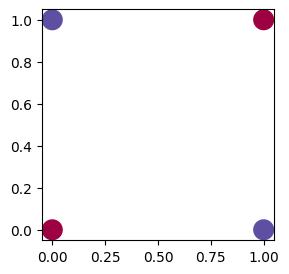

In [3]:
# XOR visualization in 2D
# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
# Visualize in 2D
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap=plt.cm.Spectral)
plt.show()


As we can see, there is no line that can separate the 2 classes. As such, we have a non-linearly separable classification problem. This calls for at least 1 hidden layer, since a single layer of weights would just create a linear regression/classification model.  

We will have:
* 2 input neurons
* 1 hidden layer with X neurons (we can choose X as we like; we would ideally think about the number of features each layer should detect, and that would be the number of neurons in that layer; think about what a feature could be, based on our experience so far; for example, a feature could be "the presence of a certain pattern", like a line, a curve, a circle, or a tail in a dog's picture; we will be talking about images and how to deal with them in the future); we will choose X=3 this time and see how it goes
* 2 output neurons (we could have only 1 neuron and interpret it's value as the probability of the input belonging to the 1st class, but we will have 2 neurons for the sake of practicing multiple outputs); each one will represent the probability of the input belonging to the i-th class (XOR=0 if $output_0$ is 1, XOR=1 if $output_1$ is 1)

In [4]:
# The dataset
# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array(
    [[1, 0], [0, 1], [0, 1], [1, 0]]
)  # we use the labels this way because we have 2 output neurons


Scikit-learn NN implementation, just to test it out.

In [5]:
# scikit
# Create the model
model = MLPClassifier(
    hidden_layer_sizes=(3),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.1,
    max_iter=1000,
)
# Train the model
model.fit(X, y)
# Predict
print(model.predict(X))
# Predict probabilities
print(model.predict_proba(X))


[[1 0]
 [0 1]
 [0 1]
 [1 0]]
[[0.9964806  0.00323421]
 [0.00182489 0.99833294]
 [0.02147105 0.9792537 ]
 [0.99731864 0.00245544]]


There are some things to unpack before doing our own implementation.  
First of all, the MLPClassifier is a multi-layer perceptron classifier. It is a neural network that can be used for classification. The parameters are as follows:
* **hidden_layer_sizes**: the number of neurons in each hidden layer; we can have multiple hidden layers, so we can pass a tuple with the number of neurons in each layer; for example, (3,2) would mean 2 hidden layers, with 3 neurons in the 1st layer and 2 neurons in the 2nd layer
* **activation**: the activation function to use; we can choose between "identity", "logistic", "tanh", "relu"; we used "relu" for this example, and results should be almost perfect, considering the small network; try playing around with the other options (especially "logistic" and "tanh") and see how the results change; for example, choosing "logistic" should give terrible results, in comparison to "relu"
* **solver**: the solver for weight optimization; we can choose between "lbfgs", "sgd", "adam"; "sgd" = stochastic gradient descent, "adam" = adaptive moment estimation (a better version of sgd, in terms of adaptivity); we used sgd here, since we've talked about batch and stochastic gradient descent before; adam is more used in real applications, since it's more efficient
* **learning_rate_init**: we know about learning rate, but the "init" part is new; it implies that the learning rate changes over time; there is another optional argument [learning_rate], which lets us choose if we want to use a constant learning rate, or a learning rate that changes over time; we used "constant" here (as the default value so it's not even in the code), but you can try playing around with it and see how it affects the results; it only works with "sgd"
* **max_iter**: the maximum number of iterations the solver will run; there are mechanisms in place to stop the training early.  

For more information, check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).  

!!!! Always make decisions based on your end goal.

### Our own implementation, but first...

Yes, we're still not totally ready. There is one more concept we should discuss.  

##### Breaking the simmetry. How to initialize weights.

Simple terms: simmetry = the same in both directions.  
Especially when using ReLU, there is a problem that can occur. Suppose we have 2 adjacent hidden layers at some point in the network.  

Initializing their weights with 0 is an *easy no-go*. Every layer's value will be 0, and the activation function will be 0 for all values going forward from that point. So no layer can have a full set of weights equal to 0 at any point. There may be cases where training / optimization decides that some weights are not needed, but that's for the training process to decide.  

The next problem: having negative weights. If, at any point, the values of neurons become negative (including 0), their derivatives, by definition (of ReLU), become 0. That means (remember the local gradients, the chain rule and the training formulas) that the weights of that previous layer will not be updated, similarly to what the vanishing gradient problem does. The conclusion is that weights should gravitate towards positive values, at least in the beginning. The training process will decide afterwards.
  
Finally: if, at any point, the weights become so similar (or downright equal) that the neurons they feed into have the same values, we essentially get multiple layers that do the same thing. This is the problem of **simmetry**. So avoid initializing with constants (or at the very least, the *same* constants).

**The solution**: initialize weights with random values, but don't let them get too big. Big values can cause the network (since formulas lead us to multiplying by those big values at some point) to keep jumping around and diverge. Make sure the bias terms also follow the same rules, since a big negative value (mathematically small, actually) in the bias can essentially make the neuron "**dead**" (since the activation function will be 0 for all values - this is called the *dead neuron problem*).  

*Final, final solution*: just randomly picking numbers for the weights isn't enough, since we still have a chance to run into the problems we've mentioned above. In practice, we pick our random numbers from certain distributions, so we're sure that our weights have the best chances of avoiding simmetry, diverging and dead neurons. As such, the normal distribution with a mean of 0 and a standard deviation of 1 is the most common choice. Of course, with negative values we still have the chance of getting that dead neuron problem, but getting 1 dead neuron vs all of them makes a big difference. In practice, we would interpret this as a feature that is unimportant.

In [6]:
# Initialize the seed, we should get the same matrices every time we run the code for the first time
np.random.seed(0)


In [7]:
# Ready to write code now
# We have the data X and y
# Building each layer
Xb = np.hstack(
    [X, np.ones((X.shape[0], 1))]
)  # add the bias, now an input set looks like [value1, value2, 1]
W1 = np.random.randn(3, 3)  # 2 inputs + 1 bias, 3 neurons in the hidden layer
H1 = Xb.dot(W1)  # 1st hidden layer values; size:
A1 = np.maximum(H1, 0)  # ReLU activation
Z1 = np.hstack(
    [A1, np.ones((A1.shape[0], 1))]
)  # add the bias, now an input set looks like [value1, value2, 1]
W2 = np.random.randn(4, 2)  # 3 inputs + 1 bias, 2 neurons in the output layer
H2 = Z1.dot(W2)  # 2nd hidden layer values
Z2 = np.maximum(H2, 0)  # ReLU activation; this is the output layer
# Softmax for final probabilities
exp_scores = np.exp(Z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
# Predictions
# predictions = np.argmax(probs, axis=1)
print(probs)
print(y)


[[0.28758257 0.71241743]
 [0.70680128 0.29319872]
 [0.36666706 0.63333294]
 [0.83582949 0.16417051]]
[[1 0]
 [0 1]
 [0 1]
 [1 0]]


This was a manual forward propagation, we would better benefit from using functions for these operations.

In [8]:
# Function for forward propagation
# Returns decision vector for each input set
def forward(X, W1, W2):
    Xb = np.hstack(
        [X, np.ones((X.shape[0], 1))]
    )  # add the bias, now an input set looks like [value1, value2, 1]
    H1 = Xb.dot(W1)  # 1st hidden layer values
    A1 = np.maximum(H1, 0)  # ReLU activation
    Z1 = np.hstack(
        [A1, np.ones((A1.shape[0], 1))]
    )  # add the bias, now an input set looks like [value1, value2, 1]
    H2 = Z1.dot(W2)  # 2nd hidden layer values
    # Softmax for final probabilities
    exp_scores = np.exp(H2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return Z1, probs


Pretty much random, since that's all we've done for now. We're now getting into the training process. We will be doing *batch gradient descent* (meaning we update after each epoch with the gradients of the whole training set, not after each sample; we can do this since the training set is so small; in other situations mini-batch / stochastic GD is preferred). Modifying the code for the sample should be easy enough as a separate exercise.  

Note: we cannot apply the ReLU activation function in the output layer, since it does a few bad things for us:  
- negative values get squashed to 0 (which is a good thing since we want probabilities, aka positive values; but consider regressions where ReLU essentially evaporates results below 0); one more thing - all values below 0 get mapped to the same value, so they get the same importance; when evaluating any kind of score, we want to differentiate values; ReLU equalizes them, so avoid it in the output layer
- it doesn't squish positive values to 1 (so it doesn't guarantee probabilities; we can get weird results)  
So we used the softmax function to map values to probabilities, and then we use GD normally with our cost function to optimize the weights.

!!!! Remember: with GD, we calculate the gradient of the cost function with respect to the weights, but the formulas we presented were applied to only 1 training instance at a time; in practice, we want to leverage parallelism, so we use the same calculations, but by using the dot product they can be applied to the whole training set at once. We can then average the results by dividing by the number of training instances, or use the learning rate to scale the results (or both; in the end, the difference at this point is in scale only).

In [9]:
# define function for training
# parameters: learning_rate, number of iterations
# we're considering the structure as fixed, we won't be doing an algorithm for any kind of NN size and structure
def train(X, y, W1, W2, learning_rate=0.01, num_iterations=10000, print_loss=False):
    Xb = np.hstack(
        [X, np.ones((X.shape[0], 1))]
    )  # add the bias, now an input set looks like [value1, value2, 1]
    loss = []
    for iter in range(num_iterations):
        # Forward propagation
        Z1, probs = forward(X, W1, W2)
        lossTemp = -np.sum(y * np.log(probs))
        loss.append(lossTemp)

        dW1 = np.zeros_like(W1)
        dW2 = np.zeros_like(W2)
        # Backpropagation
    
        cost = probs - y
        # Output layer
        dZ2 = np.mat(cost)  # 1x2
        Z1t = np.mat(Z1)  # 1x4
        dW2 += np.dot(Z1t.T, dZ2)  # 4x2
        # Hidden layer
        dZ1 = np.dot(dZ2, W2.T) 
        dZ1 = np.multiply(dZ1, (Z1t > 0))
        dZ1 = np.mat(dZ1)
        dW1 += np.dot(np.mat(Xb).T, dZ1[:,:-1])  # 3x3
        # print(dZ2)

        # Update the weights
        W1 -= learning_rate * dW1 
        W2 -= learning_rate * dW2
        # Print the loss
        if print_loss and iter % 1000 == 0:
            print("Loss after iteration %i: %f" % (iter, lossTemp))
    return loss, W1, W2


# Train the model
loss, W1, W2 = train(
    X, y, W1, W2, learning_rate=0.01, num_iterations=10000, print_loss=True
)


Loss after iteration 0: 3.109240
Loss after iteration 1000: 0.262776
Loss after iteration 2000: 0.055071
Loss after iteration 3000: 0.027412
Loss after iteration 4000: 0.017533
Loss after iteration 5000: 0.012641
Loss after iteration 6000: 0.009770
Loss after iteration 7000: 0.007901
Loss after iteration 8000: 0.006598
Loss after iteration 9000: 0.005641


Play around with the parameters, of course. Especially the learning rate, and see how it affects the training process.

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


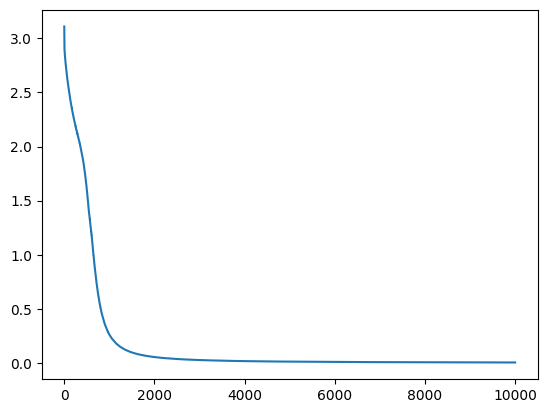

In [10]:
# Plotting the loss over time
_, probs = forward(X, W1, W2)
# 
print(np.around(probs) == y)
plt.plot(loss)


We generally plot this error over time so we make sure that the training process is working as intended. Of course, we don't actually need 10000 iterations, so that's why you should tweak the parameters some more. In practice, often times the architecture / method itself is not the faulty part, but the parameters.  
### Always tweak 1 parameter at a time, and make sure to properly analyze the results.  
It's a general fact that changing more than 1 thing at a time makes it impossible to be sure which changed what. Bonus tip: make sure that no random factors are involved in the tweaking process. For example, initializing the weights with random values is a random factor, so make sure to reseed and initialize with the same weights when testing how a different value for a parameter influences the results.

# Recap  
  
#### Network representation  
  
You can choose any kind of representation you want, of course. But we want to make our work easier, so we generally use matrices, due to the operations they allow. Frameworks have their own internal representation, but we use numpy arrays and matrices to demonstrate the concepts.  
  
So the input layer looks like this:  
$$\begin{bmatrix} x_1 \ x_2 \ \dots \ x_n \ 1 \end{bmatrix}$$  
We chose to list them horizontally because each row will then represent a training example, and we can add the bias term here.  

As we mentioned, we choose to integrate the bias terms into the input/weights/hidden nodes matrices. This means we make calculations easier on the forward pass. In the backpropagation process, we just have to make sure that we omit the bias terms when calculating gradients, so that we keep our matrices sizes consistent.  

The hidden layers look like this:
$$\begin{bmatrix} h_1 \ h_2 \ \dots \ h_m \ 1 \end{bmatrix}$$  
We added the bias term, don't forget the $h_i$ values are the outputs of the activation function.  

The weights are represented as matrices, so a general representation would look like this:
$$\begin{bmatrix} w_{11} \ w_{12} \ \dots \ w_{1m} \ w_{1b} \\ w_{21} \ w_{22} \ \dots \ w_{2m} \ w_{2b} \\ \vdots \\ w_{n1} \ w_{n2} \ \dots \ w_{nm} \ w_{nb} \end{bmatrix}$$  
The bias terms are the last column. The first index represents the node the weight starts from, and the second index represents the node the weight ends at.  

The output layer is the only one that doesn't have a bias term, so it looks like this:
$$\begin{bmatrix} o_1 \ o_2 \ \dots \ o_k \end{bmatrix}$$  

Of course, feeding multiple training examples at once is a thing, so we get multiple output rows this way. But in the training process, we can either use the whole dataset at once, or we can use mini-batches. That is a decision we make, with the goal of speeding up the process OR raising our accuracy chances.

#### Forward propagation

We use the formulas we presented earlier (which ammounts to dot products and activation functions) to generate the output. In the case of classification problems, we use sigmoid (for binary classification with a single output) and softmax (for multiclass classification with multiple outputs).  

#### Backpropagation

We use the formulas we presented earlier (which ammounts to derivatives of the activation functions and the cost function) to calculate the gradients of the cost function with respect to the weights. We then use these gradients to update the weights.  
During this process, we make the decision to integrate the bias terms into the weights or keep it separate, to use mini-batch / batch / stochastic gradient descent, and to use the cost function we want.

## The types of gradient descent 

Let's recap the types, their strengths and weaknesses.

**Batch gradient descent**:
- uses the whole dataset to calculate the gradient
- slow
- more accurate

**Stochastic gradient descent**:
- uses 1 sample to calculate the gradient
- fast
- less accurate (stumbles around, but overall in the direction of the minimum)

**Mini-batch gradient descent**:
- uses a subset of the dataset to calculate the gradient
- somewhere in between the other 2

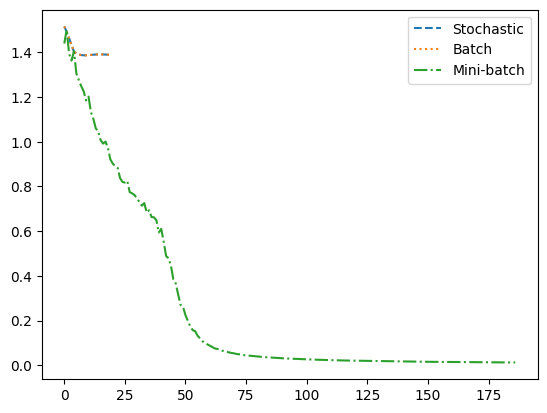

In [11]:
# Visualizing batch, mini-batch and stochastic gradient descent using scikit
# Batch
model = MLPClassifier(
    hidden_layer_sizes=(3),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.1,
    max_iter=1000,
    batch_size=4,
)
model.fit(X, y)
batchErrors = model.loss_curve_
# Mini-batch
model2 = MLPClassifier(
    hidden_layer_sizes=(3),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.1,
    max_iter=1000,
    batch_size=2,
)
model2.fit(X, y)
minibatchErrors = model2.loss_curve_
# Stochastic
model3 = MLPClassifier(
    hidden_layer_sizes=(3),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.1,
    max_iter=1000,
    batch_size=1,
)
model3.fit(X, y)
stochasticErrors = model.loss_curve_
plt.plot(stochasticErrors, label="Stochastic", linestyle="--")
plt.plot(batchErrors, label="Batch", linestyle=":")
plt.plot(minibatchErrors, label="Mini-batch", linestyle="-.")
plt.legend()
plt.show()



I used dashed lines because they're often positioned on top of each other. The learning rate is an important factor here, try to play around with the values and see if it makes a difference (a bigger learning rate might lead to failure of convergence, or to a faster one).